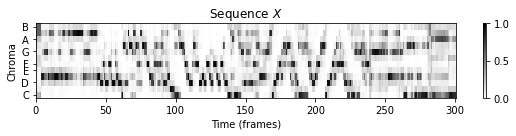

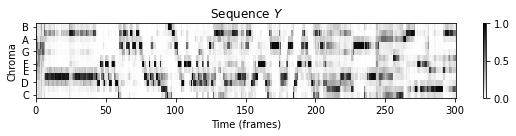

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

import sys
sys.path.append('..')
import libfmp.c3

Fs = 22050
fn_wav_X = os.path.join('1_Audio', 'Beethoven_Op007-01_FJ62.wav')
fn_wav_Y = os.path.join('1_Audio', 'Beethoven_Op007-01_AS35.wav')
X_wav, Fs = librosa.load(fn_wav_X, sr=Fs)
Y_wav, Fs = librosa.load(fn_wav_Y, sr=Fs)
X_wav = X_wav[0:Fs*30]
Y_wav = Y_wav[0:Fs*30]
N = 4410
H = 2205
X = librosa.feature.chroma_stft(y=X_wav, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
Y = librosa.feature.chroma_stft(y=Y_wav, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)

plt.figure(figsize=(8, 2))
plt.title('Sequence $X$')
librosa.display.specshow(X, x_axis='frames', y_axis='chroma', cmap='gray_r', hop_length=H)
plt.xlabel('Time (frames)')
plt.ylabel('Chroma')
plt.colorbar()
plt.clim([0, 1])
plt.tight_layout(); plt.show()
ipd.display(ipd.Audio(X_wav, rate=Fs))

plt.figure(figsize=(8, 2))
plt.title('Sequence $Y$')
librosa.display.specshow(Y, x_axis='frames', y_axis='chroma', cmap='gray_r', hop_length=H)
plt.xlabel('Time (frames)')
plt.ylabel('Chroma')
plt.colorbar()
plt.clim([0, 1])
plt.tight_layout(); plt.show()
ipd.display(ipd.Audio(Y_wav, rate=Fs))

<ipython-input-10-502a9236bbb7>:10: RuntimeWarning: divide by zero encountered in longlong_scalars
  bpm.append(60 * (dur_score / dur_audio))
e:\Work\University\sound\ext-exam\.conda\lib\site-packages\numpy\lib\function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


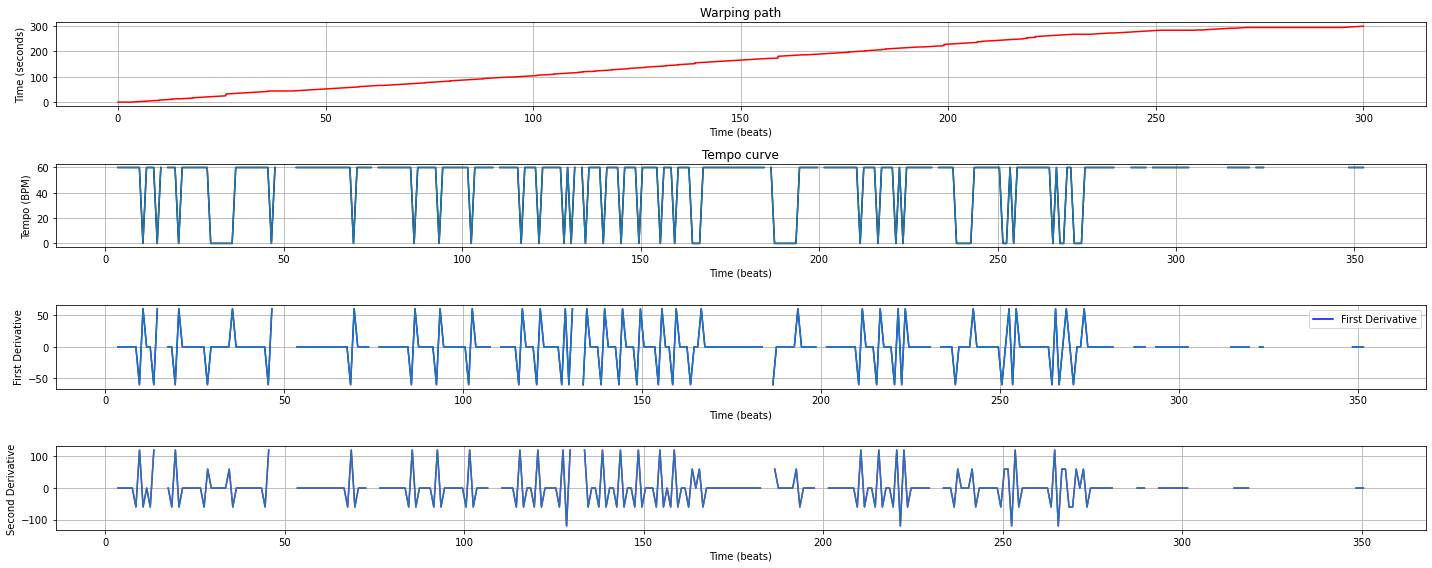

In [10]:
C = libfmp.c3.compute_cost_matrix(X, Y)
D = libfmp.c3.compute_accumulated_cost_matrix(C)
P = libfmp.c3.compute_optimal_warping_path(D)

bpm = []
pos_audio1, pos_score1 = P[0, :]
for pos_audio2, pos_score2  in P[1:]:
    dur_audio = pos_audio2 - pos_audio1
    dur_score = pos_score2 - pos_score1
    bpm.append(60 * (dur_score / dur_audio))
    pos_audio1, pos_score1 = pos_audio2, pos_score2

# Calculate derivatives
first_derivative = np.diff(bpm, n=1)
second_derivative = np.diff(bpm, n=2)

# X-axis values for derivatives
x_bpm = np.arange(len(bpm)) + 0.5
x_first_derivative = x_bpm[:-1]  # Adjusted for first derivative
x_second_derivative = x_bpm[:-2]  # Adjusted for second derivative


# Plotting
fig, ax = plt.subplots(4, 1, figsize=(20, 8))

ax[0].plot(P[:, 1], P[:, 0],'r-')
ax[0].grid()
ax[0].set_xlabel('Time (beats)')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_title('Warping path')
ax[1].plot(np.arange(len(bpm)) + 0.5, bpm, 'k-')
ax[1].plot(np.arange(len(bpm)) + 0.5, bpm)

ax[1].grid()
ax[1].set_xlabel('Time (beats)')
ax[1].set_ylabel('Tempo (BPM)')
ax[1].set_title('Tempo curve')

# Plot first derivative
ax[2].plot(x_first_derivative, first_derivative, 'b-', label='First Derivative')
ax[2].plot(x_first_derivative, first_derivative)
ax[2].grid()
ax[2].set_xlabel('Time (beats)')
ax[2].set_ylabel('First Derivative')
ax[2].legend()

# Plot second derivative
ax[3].plot(x_second_derivative, second_derivative, 'm-', label='Second Derivative')
ax[3].plot(x_second_derivative, second_derivative)
ax[3].grid()
ax[3].set_xlabel('Time (beats)')
ax[3].set_ylabel('Second Derivative')
plt.tight_layout()